In [1]:
import os
import pandas as pd
import json
import gzip
import fasttext
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Berechnen der allgemeinen Stats Datei über alle Columns und Klassen

In [25]:
path3 = '../src/data/data/CSV_files'
csv_files = [file for file in os.listdir(path3) if file.endswith('.csv')]

In [26]:
path3 = '../src/data/data/CSV_files'
#csv_files = [file for file in os.listdir(path3) if file.endswith('.csv')]
all_files = pd.DataFrame()
csv_files = ['SportsTeam_stats.csv', 'CreativeWork_stats.csv', 'Dataset_stats.csv', 'TVEpisode_stats.csv', 
             'Recipe_stats.csv', 'LocalBusiness_stats.csv', 'Movie_stats.csv', 'MusicAlbum_stats.csv', 
             'Place_stats.csv', 'MusicRecording_stats.csv', 'Event_stats.csv', 'RadioStation_stats.csv', 
             'Person_stats.csv', 'Book_stats.csv','Hotel_stats.csv','Restaurant_stats.csv'
             ]
#print(csv_files)
i = 0
num_tab= [66,81342,111,246,8748,11800,1369,291,5128,12884,22464,56,12830,1885,1096,1157,435182]
for file in csv_files:
    df = pd.read_csv(os.path.join(path3, '{}'.format(file)))
    df = df.iloc[:,:2]
    df['Filename'] = os.path.basename(file)
    nam = os.path.basename(file).rsplit('_', 1)[0]
    df.columns = ['column_name','percentage','filename']
    #df['dataset_tables'] = (df['percentage'] * (len(os.listdir('../src/data/data/{}/All'.format(nam)))))
    df['dataset_tables'] = (df['percentage'] * num_tab[i])
    #num_tab.append((len(os.listdir('../src/data/data/{}/All'.format(nam)))))
    df.columns = ['column_name','percentage','filename','num_tables']
    all_files = all_files.append(df)
    i= i+1
all_files = all_files.sort_values(['percentage'],ascending = False)
all_files

#[(all_files['percentage']<1) & (all_files['num_tables']>50)]

,column_name,percentage,filename,num_tables
100,page_url,1.000000,Restaurant_stats.csv,1157.0
145,row_id,1.000000,Recipe_stats.csv,8748.0
58,page_url,1.000000,MusicAlbum_stats.csv,291.0
208,page_url,1.000000,LocalBusiness_stats.csv,11800.0
95,row_id,1.000000,Hotel_stats.csv,1096.0
...,...,...,...,...
41,postid,0.000012,CreativeWork_stats.csv,1.0
42,memberof,0.000012,CreativeWork_stats.csv,1.0
43,slogan,0.000012,CreativeWork_stats.csv,1.0
44,barcode,0.000012,CreativeWork_stats.csv,1.0


In [27]:
# products anpassung
products = pd.read_csv('../src/data/data/CSV_files/Product_stats.csv')

In [28]:
products = products.rename(columns={'page_url': 'column_name', '1.0':'percentage', '435182': 'num_tables'})
products.drop(['855', '435182.1'], axis=1, inplace=True)
products['filename'] = 'Product_stats.csv'
df = products[['column_name', 'percentage', 'filename', 'num_tables']]
df = df.iloc[1: , :]

In [29]:
all_files = all_files.append(df).sort_values(['percentage'],ascending = False)

In [30]:
all_files = all_files[(all_files['percentage']<1) & (all_files['num_tables']>50)]

In [31]:
all_files.to_csv('../src/data/data/CSV_files/all_files_stats.csv', index=False)
all_files

,column_name,percentage,filename,num_tables
95,name,0.997982,MusicRecording_stats.csv,12858.0
144,name,0.995770,Recipe_stats.csv,8711.0
1,name,0.994361,Product_stats.csv,432728.0
98,name,0.987900,Restaurant_stats.csv,1143.0
94,name,0.983577,Hotel_stats.csv,1078.0
...,...,...,...,...
68,seller,0.000152,Product_stats.csv,66.0
69,type,0.000149,Product_stats.csv,65.0
70,telephone,0.000142,Product_stats.csv,62.0
71,additionaltype,0.000136,Product_stats.csv,59.0


In [32]:
pd.read_csv('../src/data/data/CSV_files/all_files_stats.csv')

,column_name,percentage,filename,num_tables
0,name,0.997982,MusicRecording_stats.csv,12858.0
1,name,0.995770,Recipe_stats.csv,8711.0
2,name,0.994361,Product_stats.csv,432728.0
3,name,0.987900,Restaurant_stats.csv,1143.0
4,name,0.983577,Hotel_stats.csv,1078.0
...,...,...,...,...
356,seller,0.000152,Product_stats.csv,66.0
357,type,0.000149,Product_stats.csv,65.0
358,telephone,0.000142,Product_stats.csv,62.0
359,additionaltype,0.000136,Product_stats.csv,59.0


In [33]:
all_files = pd.read_csv('../src/data/data/CSV_files/all_files_stats.csv')
all_files['column_name'].sort_values(ascending=True).unique()
columns_out = ['%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20children',
       '%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20parent',
       '%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20relatedto',
       '%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20sibling',
       '%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20spouse', '-', '0',
       '1', '2', '3', '4', '5', '6', '7', '8', '9', '\\"byartist\\"',
       '\\u201cauthor\\u201d', '\\u201ccooktime\\"',
       '\\u201ddescription\\u201d', '\\u201dname\\u201d', 
       'contenturl', 'discussionurl', 'image', 'imageobject','imageremoved', 
       'page_url', 'userightsurl', 'targeturl','thumbnailurl','url',
       'primaryimageofpage','p><meta','package-condition-link',
       'photo','photos', 'pm','resultphoto', 'tu00e9lu00e9phone', "validation%20de%20l'avis",
        'webaddress', 'website', 'nan','text','logo'
              ,'video','summary','knows','about','description','aiablogid','aiapostid','row_id']
all_files_cleaned= all_files[all_files.column_name.isin(columns_out) == False]
all_files_cleaned = all_files_cleaned[ (all_files_cleaned['num_tables']>50)]
all_files_cleaned=all_files_cleaned.sort_values(['num_tables'],ascending = False)
all_files_cleaned = all_files_cleaned.iloc[:210]
#all_files_cleaned#['column_name'].unique()# = all_files_cleaned.groupby('column_name').agg({'percentage':'mean','filename':['count','sum'],'num_tables':['sum','mean']}).sort_values(by=[( 'filename',   'count'),('num_tables','mean')],ascending=False)
#all_files_cleaned.index.unique()
#all_files_cleaned['column_name'].unique()#.groupby(['filename']).agg({'percentage':'mean','num_tables':['sum','mean'],'column_name':['sum','count']})

In [34]:
all_files_cleaned.index=all_files_cleaned['column_name'] # nicht beachtet, ob in der column viele nan Werte sind
#all_files_cleaned

In [35]:
all_files_cleaned.drop(['sku'], axis=0, inplace=True)

In [36]:
all_files_cleaned.drop(['productid'], axis=0, inplace=True)

In [37]:
#all_files_cleaned['column_name'].unique()

In [38]:
dicti= {'breadcrumb':'string', 'bestrating': 'string', 'availability': 'string', 'audience': 'string', 'additionalproperty': 'string', 'category': 'string', 'mpn':'string', 'mainentityofpage':'string', 'headline':'string', 'author':'string', 'datepublished':'datetime',
       'jobtitle':'string', 'birthdate':'datetime', 'givenname':'string', 'familyname':'string', 'telephone':'float',
       'email':'string', 'deathdate':'datetime', 'additionalname':'string', 'datemodified':'datetime', 'gender':'string',
       'name':'string', 'enddate':'datetime', 'location':'string', 'worksfor':'string', 'height':'float', 'address':'string',
       'nationality':'string', 'weight':'float', 'affiliation':'string', 'homelocation':'string', 'duration':'datetime',
       'byartist':'string', 'performer':'string', 'knowslanguage':'string', 'makesoffer':'string', 'inalbum':'string',
       'sameas':'string', 'recipeinstructions':'string', 'publisher':'string', 'recipeyield':'string',
       'organizer':'string', 'recipeingredient':'string', 'preptime':'datetime', 'aiapostid':'float',
       'aiablogid':'float', 'cooktime':'datetime', 'offers':'string', 'totaltime':'datetime', 'birthplace':'string',
       'recipecategory':'string', 'memberof':'string', 'faxnumber':'float', 'worklocation':'string',
       'contactpoint':'string', 'eventstatus':'string', 'recipecuisine':'string', 'aggregaterating':'string',
       'keywords':'string', 'geo':'geolocation', 'nutrition':'string', 'pricerange':'string', 'honorificsuffix':'string',
       'interactionstatistic':'string', 'alumniof':'string', 'ispartof':'string', 'alternatename':'string',
       'owns':'string', 'knowsabout':'string', 'eventattendancemode':'string', 'ingredients':'string',
       'datecreated':'datetime', 'disambiguatingdescription':'string', 'award':'string',
       'openinghours':'string', 'brand':'string', 'isbn':'float', 'honorificprefix':'string', 'identifier':'float',
       'deathplace':'string', 'openinghoursspecification':'string', 'alternativeheadline':'string',
       'spouse':'string', 'servescuisine':'string', 'numberofpages':'int', 'performtime':'datetime',
       'review':'string', 'potentialaction':'string', 'interactioncount':'int', 'articlebody':'string',
       'articlesection':'string', 'parent':'string', 'bookformat':'string', 'relatedto':'string',
       'inlanguage':'string', 'seeks':'string', 'performerin':'string', 'children':'string', 'networth':'string',
       'cookingmethod':'string', 'legalname':'string', 'suitablefordiet':'string', 'commentcount':'int',
       'hasmenu':'string', 'awards':'string', 'colleague':'string', 'hasoccupation':'string',
       'acceptsreservations':'string', 'genre':'string', 'interactiontype':'string',
       'addresslocality':'string', 'title':'string', 'areaserved':'string', 'creator':'string',
       'streetaddress':'string', 'addressregion':'string', 'postalcode':'float', 'hasoffercatalog':'string',
       'subjectof':'string', 'sibling':'string', 'starrating':'string', 'paymentaccepted':'string',
       'bookedition':'string', 'role':'string', 'hascredential':'string', 'founder':'string', 'citystatezip':'float',
       'color': 'string', 'condition': 'string', 'copyrightholder': 'string', 'datetime': 'string', 'depth': 'float', 
    'doortime': 'datetime', 'episodenumber': 'int', 'gtin': 'int', 'gtin12': 'int', 'gtin13': 'int', 
    'gtin14': 'int', 'gtin8': 'int', 'hasmap': 'string', 'isrelatedto': 'string', 'issimilarto': 'string', 'itemcondition': 'string', 
    'itemlistelement': 'string', 'manufacturer': 'string', 'material': 'string', 'menu': 'string', 'model': 'string',
    'numtracks': 'int','offerdetails': 'string','partofseries': 'string','performers': 'string','price': 'float',
    'pricecurrency': 'string','ratingvalue': 'string','releasedate': 'datetime','reviewcount': 'int',
    'reviews': 'string','shop-currency': 'string','track': 'int','typicalagerange': 'string','version': 'int',
                    'width': 'float','worstrating': 'string', 'copyrightyear': 'datetime'}
all_files_cleaned=all_files_cleaned.replace({"column_name": dicti})


In [39]:
all_files_cleaned = all_files_cleaned.rename(columns={'column_name':'data_type'})
all_files_cleaned = all_files_cleaned.reset_index()
data_t = all_files_cleaned

In [40]:
data_t=data_t.groupby('data_type').agg({'percentage':'count'})
data_t

,percentage
data_type,
datetime,21
float,18
geolocation,5
int,13
string,151


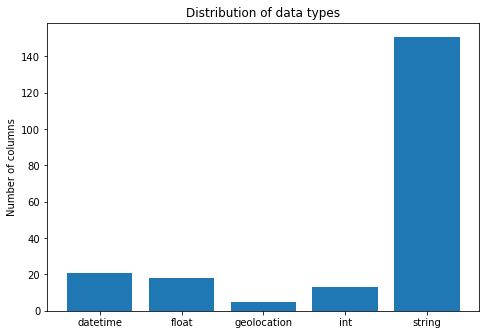

In [41]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(data_t.index,data_t['percentage'])
ax.set_ylabel('Number of columns')
ax.set_title('Distribution of data types')
plt.show()

In [42]:
all_files_cleaned['schema_type'] = all_files_cleaned['column_name'] + '/ ' + all_files_cleaned['filename']
all_files_cleaned.schema_type.unique()

array(['name/ Product_stats.csv', 'offers/ Product_stats.csv',
       'brand/ Product_stats.csv', 'headline/ CreativeWork_stats.csv',
       'author/ CreativeWork_stats.csv',
       'datepublished/ CreativeWork_stats.csv',
       'aggregaterating/ Product_stats.csv',
       'datemodified/ CreativeWork_stats.csv', 'mpn/ Product_stats.csv',
       'category/ Product_stats.csv', 'name/ Event_stats.csv',
       'enddate/ Event_stats.csv', 'location/ Event_stats.csv',
       'review/ Product_stats.csv', 'name/ MusicRecording_stats.csv',
       'duration/ MusicRecording_stats.csv',
       'byartist/ MusicRecording_stats.csv',
       'name/ LocalBusiness_stats.csv', 'performer/ Event_stats.csv',
       'address/ LocalBusiness_stats.csv',
       'manufacturer/ Product_stats.csv',
       'inalbum/ MusicRecording_stats.csv',
       'itemcondition/ Product_stats.csv', 'name/ Recipe_stats.csv',
       'model/ Product_stats.csv', 'telephone/ LocalBusiness_stats.csv',
       'name/ CreativeWork_stat

In [43]:
dict_matches={'mainentityofpage/ Product_stats.csv':'text_description',
       'headline/ CreativeWork_stats.csv':'headline',
       'author/ CreativeWork_stats.csv':'person_name',
       'datepublished/ CreativeWork_stats.csv':'date',
       'jobtitle/ Product_stats.csv':'text_description', 'birthdate/ Product_stats.csv':'date',
       'givenname/ Product_stats.csv':'product_name', 'familyname/ Product_stats.csv':'person_name',
       'telephone/ Product_stats.csv':'phone_number', 'email/ Product_stats.csv':'email',
       'deathdate/ Product_stats.csv':'date',
       'additionalname/ Product_stats.csv':'product_name',
       'datemodified/ CreativeWork_stats.csv':'date',
       'gender/ Product_stats.csv':'gender', 'name/ Event_stats.csv':'text_description',
       'enddate/ Event_stats.csv':'date', 'location/ Event_stats.csv':'place',
       'worksfor/ Product_stats.csv':'product_name', 'height/ Product_stats.csv':'number',
       'address/ Product_stats.csv':'address', 'nationality/ Product_stats.csv':'nationality',
       'weight/ Product_stats.csv':'number', 'affiliation/ Product_stats.csv':'text_description',
       'homelocation/ Product_stats.csv':'place',
       'name/ MusicRecording_stats.csv':'name_music',
       'duration/ MusicRecording_stats.csv':'time',
       'byartist/ MusicRecording_stats.csv':'person_name',
       'name/ LocalBusiness_stats.csv':'text_description', 'performer/ Event_stats.csv':'person_name',
       'address/ LocalBusiness_stats.csv':'address',
       'knowslanguage/ Product_stats.csv':'language',
       'makesoffer/ Product_stats.csv':'boolean',
       'inalbum/ MusicRecording_stats.csv':'name_music', 'name/ Recipe_stats.csv':'text_description',
       'telephone/ LocalBusiness_stats.csv':'phone_number', 'sameas/ Product_stats.csv':'text_description',
       'name/ CreativeWork_stats.csv':'text_description',
       'recipeinstructions/ Recipe_stats.csv':'text_description', 'author/ Recipe_stats.csv':'person_name',
       'publisher/ CreativeWork_stats.csv':'name',
       'recipeyield/ Recipe_stats.csv':'text_description', 'organizer/ Event_stats.csv':'name',
       'recipeingredient/ Recipe_stats.csv':'text_description',
       'mainentityofpage/ Person_stats.csv':'text_description', 'preptime/ Recipe_stats.csv':'time',
       'aiapostid/ Product_stats.csv':'id', 'aiablogid/ Product_stats.csv':'id',
       'cooktime/ Recipe_stats.csv':'time', 'datepublished/ Recipe_stats.csv':'date',
       'offers/ numberEvent_stats.csv':'offer', 'totaltime/ Recipe_stats.csv':'time',
       'birthplace/ Product_stats.csv':'place',
       'recipecategory/ Recipe_stats.csv':'category',
       'mainentityofpage/ CreativeWork_stats.csv':'text_description',
       'memberof/ Product_stats.csv':'product_name', 'faxnumber/ Product_stats.csv':'fax_number',
       'name/ Place_stats.csv':'place', 'worklocation/ Product_stats.csv':'place',
       'contactpoint/ Product_stats.csv':'text_description', 'eventstatus/ Event_stats.csv':'text_description',
       'recipecuisine/ Recipe_stats.csv':'text_description',
       'aggregaterating/ Recipe_stats.csv':'rating', 'keywords/ Recipe_stats.csv':'text_description',
       'geo/ LocalBusiness_stats.csv':'place', 'geo/ Place_stats.csv':'place',
       'nutrition/ Recipe_stats.csv':'text_description',
       'pricerange/ LocalBusiness_stats.csv':'range',
       'honorificsuffix/ Product_stats.csv':'text_description',
       'interactionstatistic/ CreativeWork_stats.csv':'number',
       'mainentityofpage/ Recipe_stats.csv':'text_description',
       'alumniof/ Product_stats.csv':'text_description', 'ispartof/ Recipe_stats.csv':'text_description',
       'alternatename/ Product_stats.csv':'product_name', 'owns/ Product_stats.csv':'text_description',
       'aggregaterating/ LocalBusiness_stats.csv':'rating',
       'email/ LocalBusiness_stats.csv':'email', 'knowsabout/ Product_stats.csv':'text_description',
       'eventattendancemode/ Event_stats.csv':'text_description',
       'ingredients/ Recipe_stats.csv':'text_description',
       'datecreated/ CreativeWork_stats.csv':'date',
       'datepublished/ Product_stats.csv':'date', 'name/ Book_stats.csv':'product_name',
       'jobtitle/ Person_stats.csv':'text_description', 'telephone/ Place_stats.csv':'phone_number',
       'birthdate/ Person_stats.csv':'date', 'datemodified/ Product_stats.csv':'date',
       'givenname/ Person_stats.csv':'person_name', 'familyname/ Person_stats.csv':'person_name',
       'telephone/ Person_stats.csv':'phone_number',
       'disambiguatingdescription/ Product_stats.csv':'text_description',
       'author/ Book_stats.csv':'person_name', 'sameas/ LocalBusiness_stats.csv':'text_description',
       'email/ Person_stats.csv':'email', 'publisher/ Product_stats.csv':'person_name',
       'faxnumber/ LocalBusiness_stats.csv':'fax_number', 'award/ Product_stats.csv':'text_description',
       'openinghours/ LocalBusiness_stats.csv':'time',
       'name/ Restaurant_stats.csv':'product_name', 'name/ Hotel_stats.csv':'product_name',
       'brand/ Product_stats.csv':'product_name', 'deathdate/ Person_stats.csv':'date',
       'isbn/ Book_stats.csv':'id', 'address/ Restaurant_stats.csv':'address',
       'honorificprefix/ Product_stats.csv':'text_description',
       'additionalname/ Person_stats.csv':'person_name', 'address/ Hotel_stats.csv':'address',
       'identifier/ Product_stats.csv':'id', 'publisher/ Book_stats.csv':'person_name',
       'telephone/ Restaurant_stats.csv':'phone_number', 'offers/ Book_stats.csv':'offer',
       'deathplace/ Product_stats.csv':'place', 'datepublished/ Book_stats.csv':'date',
       'openinghoursspecification/ LocalBusiness_stats.csv':'time',
       'alternativeheadline/ CreativeWork_stats.csv':'headline',
       'spouse/ Product_stats.csv':'person_name', 'gender/ Person_stats.csv':'gender',
       'servescuisine/ Restaurant_stats.csv':'boolean',
       'telephone/ Hotel_stats.csv':'phone_number', 'duration/ Event_stats.csv':'time',
       'geo/ Restaurant_stats.csv':'place', 'numberofpages/ Book_stats.csv':'number',
       'pricerange/ Restaurant_stats.csv':'range',
       'performtime/ Recipe_stats.csv':'time',
       'keywords/ CreativeWork_stats.csv':'text_description',
       'review/ LocalBusiness_stats.csv':'review',
       'potentialaction/ Product_stats.csv':'text_description',
       'interactioncount/ Product_stats.csv':'number',
       'articlebody/ CreativeWork_stats.csv':'text_description', 'sameas/ Place_stats.csv':'place',
       'contactpoint/ LocalBusiness_stats.csv':'text_description',
       'articlesection/ Product_stats.csv':'text_description', 'parent/ Product_stats.csv':'text_description',
       'author/ Product_stats.csv':'person_name', 'worksfor/ Person_stats.csv':'person_name',
       'pricerange/ Hotel_stats.csv':'range', 'height/ Person_stats.csv':'number',
       'geo/ Hotel_stats.csv':'place', 'bookformat/ Book_stats.csv':'text_description',
       'address/ Person_stats.csv':'address',
       'aggregaterating/ CreativeWork_stats.csv':'rating',
       'nationality/ Person_stats.csv':'nationality',
       'aggregaterating/ Product_stats.csv':'rating',
       'aggregaterating/ Hotel_stats.csv':'rating', 'weight/ Person_stats.csv':'number',
       'affiliation/ Person_stats.csv':'text_description',
       'aggregaterating/ Restaurant_stats.csv':'rating',
       'relatedto/ Product_stats.csv':'product_name', 'homelocation/ Person_stats.csv':'place',
       'interactioncount/ CreativeWork_stats.csv':'number',
       'inlanguage/ CreativeWork_stats.csv':'language', 'seeks/ Product_stats.csv':'product_name',
       'performerin/ Product_stats.csv':'person_name', 'inlanguage/ Book_stats.csv':'language',
       'children/ Product_stats.csv':'product_name', 'networth/ Product_stats.csv':'number',
       'cookingmethod/ Recipe_stats.csv':'text_description',
       'legalname/ LocalBusiness_stats.csv':'text_description', 'review/ Recipe_stats.csv':'review',
       'suitablefordiet/ Recipe_stats.csv':'boolean',
       'commentcount/ CreativeWork_stats.csv':'number',
       'hasmenu/ Restaurant_stats.csv':'boolean', 'awards/ Product_stats.csv':'text_description',
       'colleague/ Product_stats.csv':'person_name', 'hasoccupation/ Product_stats.csv':'boolean',
       'acceptsreservations/ Restaurant_stats.csv':'boolean',
       'knowslanguage/ Person_stats.csv':'language',
       'openinghoursspecification/ Restaurant_stats.csv':'time',
       'genre/ Book_stats.csv':'genre', 'interactiontype/ CreativeWork_stats.csv':'text_description',
       'aggregaterating/ Book_stats.csv':'rating', 'name/ MusicAlbum_stats.csv':'name_music',
       'makesoffer/ Person_stats.csv':'boolean',
       'addresslocality/ Product_stats.csv':'address', 'title/ Product_stats.csv':'product_name',
       'areaserved/ LocalBusiness_stats.csv':'place',
       'location/ LocalBusiness_stats.csv':'place',
       'addresslocality/ LocalBusiness_stats.csv':'address',
       'creator/ CreativeWork_stats.csv':'person_name', 'sameas/ Person_stats.csv':'person_name',
       'streetaddress/ LocalBusiness_stats.csv':'address',
       'addressregion/ LocalBusiness_stats.csv':'address',
       'postalcode/ LocalBusiness_stats.csv':'zipcode',
       'hasoffercatalog/ Product_stats.csv':'boolean',
       'subjectof/ Product_stats.csv':'text_description', 'sibling/ Product_stats.csv':'product_name',
       'name/ TVEpisode_stats.csv':'name',
       'datepublished/ MusicRecording_stats.csv':'date',
       'starrating/ Hotel_stats.csv':'text_description',
       'paymentaccepted/ LocalBusiness_stats.csv':'text_description',
       'genre/ CreativeWork_stats.csv':'genre', 'bookedition/ Book_stats.csv':'text_description',
       'datemodified/ Recipe_stats.csv':'date', 'role/ Product_stats.csv':'text_description',
       'keywords/ Product_stats.csv':'text_description', 'creator/ Product_stats.csv':'person_name',
       'hascredential/ Product_stats.csv':'boolean',
       'founder/ LocalBusiness_stats.csv':'person_name',
       'citystatezip/ LocalBusiness_stats.csv':'zipcode',
       'aiapostid/ Person_stats.csv':'id', 'aiablogid/ Person_stats.csv':'id',
        "episodenumber/ TVEpisode_stats.csv": "number", "hasmap/ LocalBusiness_stats.csv": "boolean",
        "gtin8/ Product_stats.csv": "gtin",  "performers/ Event_stats.csv": "name", 
        "copyrightyear/ CreativeWork_stats.csv": "date", "worklocation/ Person_stats.csv": "address",
        "menu/ Restaurant_stats.csv": "text_description", "audience/ Product_stats.csv": "text_description",
        "byartist/ MusicAlbum_stats.csv": "name", "doortime/ Event_stats.csv": "datetime", "isrelatedto/ Product_stats.csv": "name",
        "genre/ MusicRecording_stats.csv": "genre", "condition/ Product_stats.csv": "condition",
         "availability/ Product_stats.csv": "text_description", "name/ Product_stats.csv":"product_name", "review/ Product_stats.csv":"review",
        "faxnumber/ Person_stats.csv": 'fax_number',
"gtin/ Product_stats.csv" : "gtin",                
"geo/ Product_stats.csv"  :  "address",                   
"pricecurrency/ Product_stats.csv":  'currency',              
"worstrating/ Product_stats.csv" : "rating",          
"gender" : "gender" ,
"offerdetails/ Product_stats.csv": "text_description" ,
"manufacturer/ Product_stats.csv": "text_description",
"issimilarto/ Product_stats.csv" : "text_description",
"gtin13/ Product_stats.csv" : "gtin",
"model/ Product_stats.csv": "text_description",
"gtin14/ Product_stats.csv" : "gtin" ,
"shop-currency/ Product_stats.csv" :"currency" ,
"gtin12/ Product_stats.csv"  : "gtin",
"birthplace/ Person_stats.csv"  : "place",
"contactpoint/ Person_stats.csv" :"text_description",
"reviewcount/ Product_stats.csv" :"number",
"owns/ LocalBusiness_stats.csv"  : "person_name",
"color/ Product_stats.csv" : "text_description", 
"openinghours/ Restaurant_stats.csv" : "datetime",
"memberof/ Person_stats.csv"   : "text_description",
"copyrightholder/ CreativeWork_stats.csv":"text_description",
"depth/ Product_stats.csv": "number",
"itemlistelement/ Product_stats.csv": "text_description",
"mpn/ Product_stats.csv": "text_description",                     
"breadcrumb/ Product_stats.csv": "text_description",
"email/ Hotel_stats.csv": "email",
"width/ Product_stats.csv" : "number",
"ratingvalue/ Product_stats.csv": "rating",
"typicalagerange/ Event_stats.csv": "range",
"headline/ Recipe_stats.csv": "headline",
"category/ Product_stats.csv" : "category",
"offers/ CreativeWork_stats.csv": "offer",
"publisher/ Recipe_stats.csv" : "name",
"numtracks/ MusicAlbum_stats.csv": "number",
"bestrating/ Product_stats.csv" : "rating",
"price/ Product_stats.csv" : "number",
"openinghoursspecification/ Place_stats.csv": "datetime",
"datecreated/ MusicRecording_stats.csv" : "date",
"additionalproperty/ Product_stats.csv": "text_description",
"fax_number": "fax_number",
"material/ Product_stats.csv": "text_description",
"offers/ Product_stats.csv": "offer",
"releasedate/ Product_stats.csv": "date",
"reviews/ Product_stats.csv": "review",
"version/ CreativeWork_stats.csv": "text_description",    
"partofseries/ TVEpisode_stats.csv" : "text_description",            
"track/ MusicAlbum_stats.csv": "number",             
"itemcondition/ Product_stats.csv": "condition",        
"nationality": "nationality",
"offers/ Event_stats.csv": "offer"}

In [44]:
all_files_cleaned.head()

,column_name,data_type,percentage,filename,num_tables,schema_type
0,name,string,0.994361,Product_stats.csv,432728.0,name/ Product_stats.csv
1,offers,string,0.964249,Product_stats.csv,419624.0,offers/ Product_stats.csv
2,brand,string,0.403728,Product_stats.csv,175695.0,brand/ Product_stats.csv
3,headline,string,0.939871,CreativeWork_stats.csv,76451.0,headline/ CreativeWork_stats.csv
4,author,string,0.776499,CreativeWork_stats.csv,63162.0,author/ CreativeWork_stats.csv


In [45]:
all_files_cleaned.index = all_files_cleaned['schema_type']

In [46]:
all_files_cleaned.head()

,column_name,data_type,percentage,filename,num_tables,schema_type
schema_type,,,,,,
name/ Product_stats.csv,name,string,0.994361,Product_stats.csv,432728.0,name/ Product_stats.csv
offers/ Product_stats.csv,offers,string,0.964249,Product_stats.csv,419624.0,offers/ Product_stats.csv
brand/ Product_stats.csv,brand,string,0.403728,Product_stats.csv,175695.0,brand/ Product_stats.csv
headline/ CreativeWork_stats.csv,headline,string,0.939871,CreativeWork_stats.csv,76451.0,headline/ CreativeWork_stats.csv
author/ CreativeWork_stats.csv,author,string,0.776499,CreativeWork_stats.csv,63162.0,author/ CreativeWork_stats.csv


In [58]:
pd.DataFrame.from_dict(dict_matches, orient='index')[0].value_counts().to_csv('overview_cats.csv')

In [ ]:
all_files_cleaned=all_files_cleaned.replace({"schema_type": dict_matches})
all_files_cleaned = all_files_cleaned.rename(columns={'schema_type':'prob_matches'})
all_files_cleaned = all_files_cleaned.reset_index()
all_files_cleaned['prob_matches'].unique

In [22]:
all_files_cleaned.prob_matches.value_counts()

text_description    50
number              15
person_name         15
date                14
place               11
rating              10
address             10
time                 9
product_name         7
name                 7
boolean              6
phone_number         5
gtin                 5
review               4
offer                4
range                4
datetime             3
name_music           3
email                3
genre                3
headline             3
language             3
condition            2
zipcode              2
currency             2
category             2
id                   2
fax_number           2
nationality          1
gender               1
Name: prob_matches, dtype: int64

In [23]:
all_files_cleaned = all_files_cleaned[all_files_cleaned['prob_matches']!="offers/ Event_stats.csv"]

In [24]:
all_files_cleaned['prob_matches'].unique()
prob_matches = all_files_cleaned.groupby('prob_matches').agg({'schema_type':['sum','count'],'num_tables':['sum','mean'],'column_name':'sum'})
prob_matches=prob_matches.sort_values(by=('schema_type','count'),ascending=False)

In [25]:
prob_matches

schema_type        \
                                                                sum count   
prob_matches                                                                
text_description  mpn/ Product_stats.csvname/ Event_stats.csvnam...    50   
number            weight/ Product_stats.csvprice/ Product_stats....    15   
person_name       author/ CreativeWork_stats.csvbyartist/ MusicR...    15   
date              datepublished/ CreativeWork_stats.csvdatemodif...    14   
place             location/ Event_stats.csvname/ Place_stats.csv...    11   
address           address/ LocalBusiness_stats.csvaddress/ Resta...    10   
rating            aggregaterating/ Product_stats.csvaggregaterat...    10   
time              duration/ MusicRecording_stats.csvpreptime/ Re...     9   
product_name      name/ Product_stats.csvbrand/ Product_stats.cs...     7   
name              publisher/ CreativeWork_stats.csvorganizer/ Ev...     7   
boolean           servescuisine/ Restaurant_stats.csvsuitablefor...     6   
gtin              gtin13/ Product_stats.csvgtin12/ Product_stats...     5   
phone_number      telephone/ LocalBusiness_stats.csvtelephone/ P...     5   
review            review/ Product_stats.csvreview/ LocalBusiness...     4   
range             pricerange/ LocalBusiness_stats.csvpricerange/...     4   
genre             genre/ Book_stats.csvgenre/ CreativeWork_stats...     3   
headline          headline/ CreativeWork_stats.csvalternativehea...     3   
language          inlanguage/ CreativeWork_stats.csvinlanguage/ ...     3   
name_music        name/ MusicRecording_stats.csvinalbum/ MusicRe...     3   
offer             offers/ Product_stats.csvoffers/ Book_stats.cs...     3   
email             email/ LocalBusiness_stats.csvemail/ Person_st...     3   
datetime          doortime/ Event_stats.csvopeninghoursspecifica...     3   
currency          pricecurrency/ Product_stats.csvshop-currency/...     2   
category          category/ Product_stats.csvrecipecategory/ Rec...     2   
condition         itemcondition/ Product_stats.csvcondition/ Pro...     2   
fax_number        faxnumber/ LocalBusiness_stats.csvfaxnumber/ P...     2   
id                isbn/ Book_stats.csvidentifier/ Product_stats.csv     2   
zipcode           postalcode/ LocalBusiness_stats.csvcitystatezi...     2   
gender                                     gender/ Person_stats.csv     1   
nationality                           nationality/ Person_stats.csv     1   

                     num_tables                 \
                            sum           mean   
prob_matches                                     
text_description  172268.365711    3445.367314   
number             25253.348195    1683.556546   
person_name       101423.267516    6761.551168   
date              130135.422505    9295.387322   
place              32394.000000    2944.909091   
address            14375.000000    1437.500000   
rating             45238.157643    4523.815764   
time               34110.000000    3790.000000   
product_name      612937.960722   87562.565817   
name               17144.000000    2449.142857   
boolean             2064.000000     344.000000   
gtin               12339.000000    2467.800000   
phone_number       13517.000000    2703.400000   
review             14869.000000    3717.250000   
range               4359.000000    1089.750000   
genre                673.159236     224.386412   
headline           77338.000000   25779.333333   
language            1033.184713     344.394904   
name_music         22349.000000    7449.666667   
offer             420649.458599  140216.486200   
email               3606.000000    1202.000000   
datetime             513.000000     171.000000   
currency            2695.000000    1347.500000   
category           28249.000000   14124.500000   
condition           9339.000000    4669.500000   
fax_number          1443.000000     721.500000   
id                  1794.553079     897.276539   
zipcode       

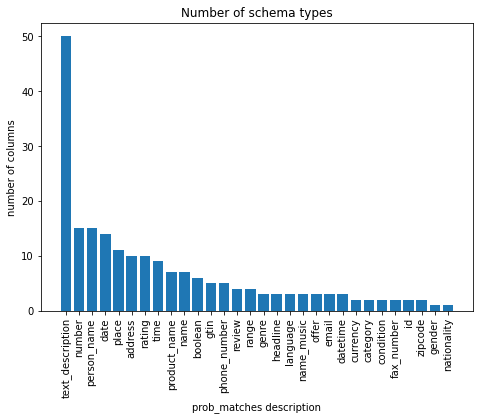

In [26]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(prob_matches.index, prob_matches[('schema_type','count')])
ax.set_ylabel('number of columns')
ax.set_xlabel('prob_matches description')
ax.set_title('Number of schema types')
plt.xticks(rotation=90)
plt.show()

In [27]:
all_files_cleaned[all_files_cleaned['prob_matches']=='text_description']

,schema_type,column_name,data_type,percentage,filename,num_tables,prob_matches
8,mpn/ Product_stats.csv,mpn,string,0.063612,Product_stats.csv,27683.000000,text_description
10,name/ Event_stats.csv,name,string,0.977252,Event_stats.csv,21953.000000,text_description
17,name/ LocalBusiness_stats.csv,name,string,0.960085,LocalBusiness_stats.csv,11329.000000,text_description
20,manufacturer/ Product_stats.csv,manufacturer,string,0.021481,Product_stats.csv,9348.000000,text_description
23,name/ Recipe_stats.csv,name,string,0.995770,Recipe_stats.csv,8711.000000,text_description
24,model/ Product_stats.csv,model,string,0.019877,Product_stats.csv,8650.000000,text_description
26,name/ CreativeWork_stats.csv,name,string,0.099629,CreativeWork_stats.csv,8104.000000,text_description
27,recipeinstructions/ Recipe_stats.csv,recipeinstructions,string,0.911980,Recipe_stats.csv,7978.000000,text_description
31,recipeyield/ Recipe_stats.csv,recipeyield,string,0.787837,Recipe_stats.csv,6892.000000,text_description
34,recipeingredient/ Recipe_stats.csv,recipeingredient,string,0.735482,Recipe_stats.csv,6434.000000,text_description


In [28]:
classes=all_files_cleaned
classes=classes.groupby('filename').agg({'column_name':['count','sum'],'num_tables':['mean','sum']})
classes = classes.sort_values(by=[('column_name','count')],ascending=False)
classes

column_name  \
                               count   
filename                               
Product_stats.csv                 48   
LocalBusiness_stats.csv           25   
Person_stats.csv                  25   
Recipe_stats.csv                  24   
CreativeWork_stats.csv            23   
Book_stats.csv                    12   
Restaurant_stats.csv              12   
Event_stats.csv                   11   
Hotel_stats.csv                    8   
MusicRecording_stats.csv           7   
Place_stats.csv                    5   
MusicAlbum_stats.csv               4   
TVEpisode_stats.csv                3   

                                                                             \
                                                                        sum   
filename                                                                      
Product_stats.csv         nameoffersbrandaggregateratingmpncategoryrevie...   
LocalBusiness_stats.csv   nameaddresstelephonegeopricerangeaggregaterati...   
Person_stats.csv          mainentityofpagejobtitlebirthdategivennamefami...   
Recipe_stats.csv          namerecipeinstructionsauthorrecipeyieldrecipei...   
CreativeWork_stats.csv    headlineauthordatepublisheddatemodifiednamepub...   
Book_stats.csv            nameauthorisbnpublisheroffersdatepublishednumb...   
Restaurant_stats.csv      nameaddresstelephoneservescuisinegeopricerange...   
Event_stats.csv           nameenddatelocationperformerorganizereventstat...   
Hotel_stats.csv           nameaddresstelephonepricerangegeoaggregaterati...   
MusicRecording_stats.csv  namedurationbyartistinalbumdatepublishedgenred...   
Place_stats.csv             namegeotelephonesameasopeninghoursspecification   
MusicAlbum_stats.csv                             namebyartisttracknumtracks   
TVEpisode_stats.csv                           namepartofseriesepisodenumber   

                            num_tables                
                                  mean           sum  
filename                                              
Product_stats.csv         25294.604167  1.214141e+06  
LocalBusiness_stats.csv    1999.600000  4.999000e+04  
Person_stats.csv            928.960000  2.322400e+04  
Recipe_stats.csv           3758.541667  9.020500e+04  
CreativeWork_stats.csv    11413.217391  2.625040e+05  
Book_stats.csv              766.239827  9.194878e+03  
Restaurant_stats.csv        568.500000  6.822000e+03  
Event_stats.csv            7699.818182  8.469800e+04  
Hotel_stats.csv             570.625000  4.565000e+03  
MusicRecording_stats.csv   6726.714286  4.708700e+04  
Place_stats.csv            2018.600000  1.009300e+04  
MusicAlbum_stats.csv        183.250000  7.330000e+02  
TVEpisode_stats.csv         171.333333  5.140000e+02

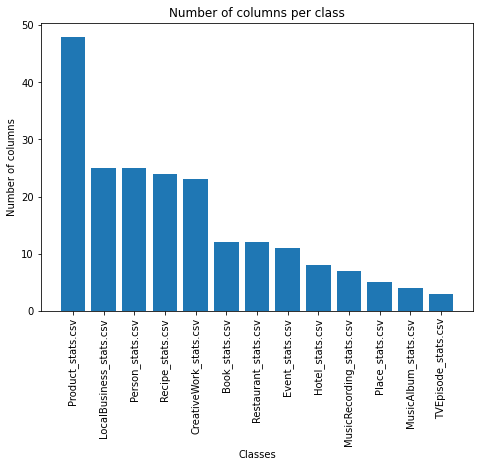

In [29]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(classes.index, classes[('column_name','count')])
ax.set_ylabel('Number of columns')
ax.set_xlabel('Classes')
ax.set_title('Number of columns per class')
plt.xticks(rotation=90)
plt.show()

In [31]:
# Histogramm x Achse Column und Anzahl Tabellen y Achse
all_files_cleaned.to_csv('all_files_cleaned.csv')

## Similarity

In [17]:
all_files_cleaned = pd.read_csv('/work-ceph/bizer-tp2021/data_integration_using_deep_learning/src/data/data/CSV_files/all_files_cleaned.csv')

In [1]:
from scipy.spatial.distance import cosine
import pandas as pd

In [9]:
#from gensim.models import KeyedVectors
#model = KeyedVectors.load_word2vec_format('fasttext.wiki.en.300.vocab_200K.vec')

In [2]:
!pip install sister

  Using cached sister-0.2.2-py3-none-any.whl (5.3 kB)
  Using cached Janome-0.3.10-py2.py3-none-any.whl (21.5 MB)
  Using cached progressbar-2.5-py3-none-any.whl
  Using cached gensim-3.8.3-cp38-cp38-manylinux1_x86_64.whl (24.2 MB)
  Using cached torch-1.5.1-cp38-cp38-manylinux1_x86_64.whl (753.2 MB)
  Using cached mecab_python3-0.996.5-cp38-cp38-manylinux2010_x86_64.whl (17.1 MB)
^C


In [3]:
import sister
embedder = sister.MeanEmbedding(lang="en")

ModuleNotFoundError: No module named 'sister'

In [ ]:
all_files_cleaned.prob_matches.value_counts()

In [ ]:
# read in files from same probmatches

In [51]:
all_files_cleaned.prob_matches.value_counts().head(9)

text_description    50
place               17
person_name         15
number              15
date                14
rating              10
time                 9
product_name         7
name                 7
Name: prob_matches, dtype: int64

<font color='red'>sollten wir noch checken ob datatype mit probmatches zsm passt?</font> 


In [18]:
all_files_cleaned[all_files_cleaned['prob_matches'] == 'rating']

,Unnamed: 0,schema_type,column_name,data_type,percentage,filename,num_tables,prob_matches
6,6,aggregaterating/ Product_stats.csv,aggregaterating,string,0.084252,Product_stats.csv,36665.000000,rating
48,49,aggregaterating/ Recipe_stats.csv,aggregaterating,string,0.422382,Recipe_stats.csv,3695.000000,rating
60,61,aggregaterating/ LocalBusiness_stats.csv,aggregaterating,string,0.181186,LocalBusiness_stats.csv,2138.000000,rating
121,122,aggregaterating/ CreativeWork_stats.csv,aggregaterating,string,0.005901,CreativeWork_stats.csv,480.000000,rating
123,124,ratingvalue/ Product_stats.csv,ratingvalue,string,0.001062,Product_stats.csv,462.000000,rating
124,125,aggregaterating/ Hotel_stats.csv,aggregaterating,string,0.415146,Hotel_stats.csv,455.000000,rating
128,129,aggregaterating/ Restaurant_stats.csv,aggregaterating,string,0.369058,Restaurant_stats.csv,427.000000,rating
133,134,bestrating/ Product_stats.csv,bestrating,string,0.000807,Product_stats.csv,351.000000,rating
146,147,aggregaterating/ Book_stats.csv,aggregaterating,string,0.157643,Book_stats.csv,297.157643,rating
150,151,worstrating/ Product_stats.csv,worstrating,string,0.000616,Product_stats.csv,268.000000,rating


In [19]:
# read all files from prob_matches file
path = '/work-ceph/bizer-tp2021/data_integration_using_deep_learning/src/data/data/Product/All'
#csv_files = [file for file in os.listdir(path) if file.endswith('.gz')]
# append all columns which have the column name -> maybe easier to just use 1 or 2 columns -> less computation time
right_tables = []
col = 'aggregaterating'
col 0
#col = 'preptime'
for file in csv_files:
    df = pd.read_json(os.path.join(path, '{}'.format(file)), compression='gzip', lines=True)
    if col in df.columns:
        right_tables.append(file)
        if len(right_tables)>10:
            break

In [20]:
# read tables
vals = []
for file in right_tables:
    df = pd.read_json(os.path.join(path, '{}'.format(file)), compression='gzip', lines=True)
    vals.append(df[col].to_list())

In [11]:
right_tables

['MusicRecording_babythugordie.com_September2020.json.gz',
 'MusicRecording_darwinmacon.com_September2020.json.gz',
 'MusicRecording_bencrosbymusic.com_September2020.json.gz',
 'MusicRecording_andyeversole.com_September2020.json.gz']

In [38]:
vals_new = []
# basic cleaning (check if needed)
for elem in vals:
    for e in elem:
        vals_new.append(re.sub("[{}:,'']+", '', str(e)))

In [ ]:
# get mean embedding vector for each row


# cosine similarity